시작 전에 페이스북에서 만든 prophet을 설치해야함
!pip install prophet
또는 콘다 환경이라면
conda install -c conda-forge prophet
-c : 패키지를 찾는 위치(채널을 결정) 
여기서는 conda-forge 채널을 사용, 커뮤니티 주도의 콘다 레포지토리임

fbprophet :  페이스북이 개발한 오픈소스 시계열 예측 라이브러리

데이터 셋
캐글의 시카고 범죄율 데이터 셋
https://www.kaggle.com/datasets/chicago/chicago-crime

feature
ID: 범죄 사건의 고유 식별자입니다.
Case Number: 사건 번호로, 경찰이 관리하는 고유 사건 추적 번호입니다.
Date: 범죄가 발생한 날짜와 시간입니다.
Block: 범죄가 발생한 도로 블록의 주소입니다.
IUCR (Illinois Uniform Crime Reporting code): 일리노이 주 통일 범죄 보고 코드로, 범죄 유형을 분류하는 코드입니다.
Primary Type: 범죄의 주요 유형입니다 (예: 절도, 살인, 폭력 등).
Description: 범죄의 세부 설명입니다.
Location Description: 범죄가 발생한 위치의 설명입니다 (예: 가게 안, 거리 위 등).
Arrest: 체포가 이루어졌는지 여부를 나타냅니다 (True/False).
Domestic: 범죄가 가정 내 폭력과 관련이 있는지 여부입니다 (True/False).
Beat: 경찰의 순찰 구역을 나타내는 코드입니다.
District: 범죄가 발생한 경찰서의 구역입니다.
Ward: 범죄가 발생한 시의회 구역입니다.
Community Area: 범죄가 발생한 커뮤니티 구역 번호입니다.
FBI Code: 연방수사국(FBI)의 범죄 분류 코드입니다.
X Coordinate: 범죄 현장의 X 좌표입니다 (일반적으로 좌표계에 기반함).
Y Coordinate: 범죄 현장의 Y 좌표입니다.
Year: 범죄가 발생한 연도입니다.
Updated On: 데이터셋이 마지막으로 업데이트된 날짜와 시간입니다.
Latitude: 범죄 현장의 위도입니다.
Longitude: 범죄 현장의 경도입니다.
Location: 범죄 현장의 위도와 경도를 포함한 위치 정보입니다.

## 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

chicago_df_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',on_bad_lines='skip')
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',on_bad_lines='skip')
chicago_df_4 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',on_bad_lines='skip')
# on_bad_lines 인자는 다음과 같은 값을 받을 수 있습니다:
# 'error': 잘못된 라인을 만나면 오류를 발생시킵니다 (기본값).
# 'warn': 잘못된 라인을 만나면 경고를 표시하고, 해당 라인을 무시합니다.
# 'skip': 잘못된 라인을 만나면 무시합니다.

/var/folders/t5/fq6jxm613jldyb4rpqfywpdm0000gn/T/ipykernel_49499/3378305255.py:7: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',on_bad_lines='skip')


In [2]:
# 데이터 합치기
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3,chicago_df_4])

In [3]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [4]:
chicago_df.shape # 600만개의 데이터

(7941282, 23)

## 데이터 시각화

In [5]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1829375.0,2001.0,08/29/2006 03:46:28 AM,41.68702,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1844832.0,2003.0,04/15/2016 08:55:02 AM,41.729712,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1895755.0,2003.0,04/15/2016 08:55:02 AM,41.869772,-87.708180,"(41.869772159, -87.708180162)"


<Axes: >

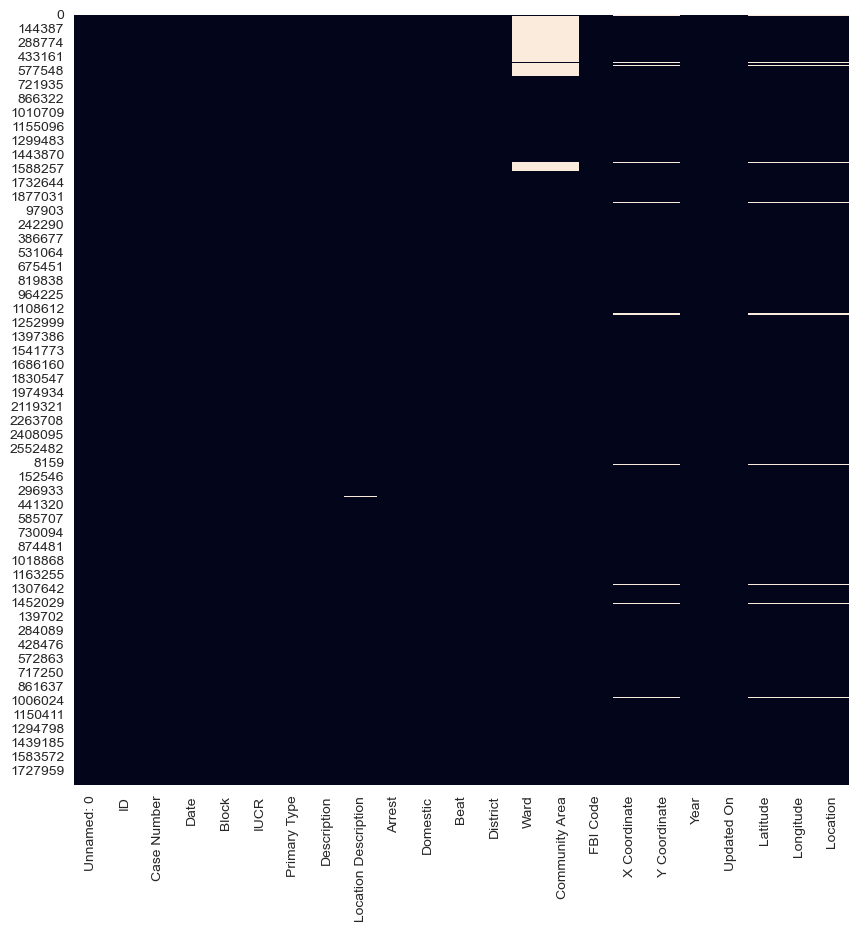

In [6]:
# null 값 확인
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(),cbar=False)

In [7]:
chicago_df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate','Y Coordinate','Updated On','Year','FBI Code','Beat','Ward','Community Area','Location','Latitude','Longitude','District'],inplace=True,axis=1)

In [8]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [9]:
# date를 datetime으로 바꾸기
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [10]:
chicago_df.Date

0         2004-01-01 00:01:00
1         2003-03-01 00:00:00
2         2004-06-20 11:00:00
3         2004-12-30 20:00:00
4         2003-05-01 01:00:00
                  ...        
1872338   2006-04-04 10:00:00
1872339   2006-04-04 17:30:00
1872340   2006-04-04 18:40:30
1872341   2006-04-04 15:50:00
1872342   2006-04-05 22:30:00
Name: Date, Length: 7941282, dtype: datetime64[ns]

In [11]:
# 범죄 발생 건수 조회
chicago_df['Primary Type'].value_counts()

Primary Type
THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                90

In [12]:
#15개만 조회하는법
chicago_df['Primary Type'].value_counts().iloc[:15]

Primary Type
THEFT                         1640506
BATTERY                       1442716
CRIMINAL DAMAGE                923000
NARCOTICS                      885431
OTHER OFFENSE                  491922
ASSAULT                        481661
BURGLARY                       470958
MOTOR VEHICLE THEFT            370548
ROBBERY                        300453
DECEPTIVE PRACTICE             280931
CRIMINAL TRESPASS              229366
PROSTITUTION                    86401
WEAPONS VIOLATION               77429
PUBLIC PEACE VIOLATION          58548
OFFENSE INVOLVING CHILDREN      51441
Name: count, dtype: int64

In [13]:
# 그거의 인덱스만 가져오기
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object', name='Primary Type')

In [14]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

<Axes: xlabel='count', ylabel='Primary Type'>

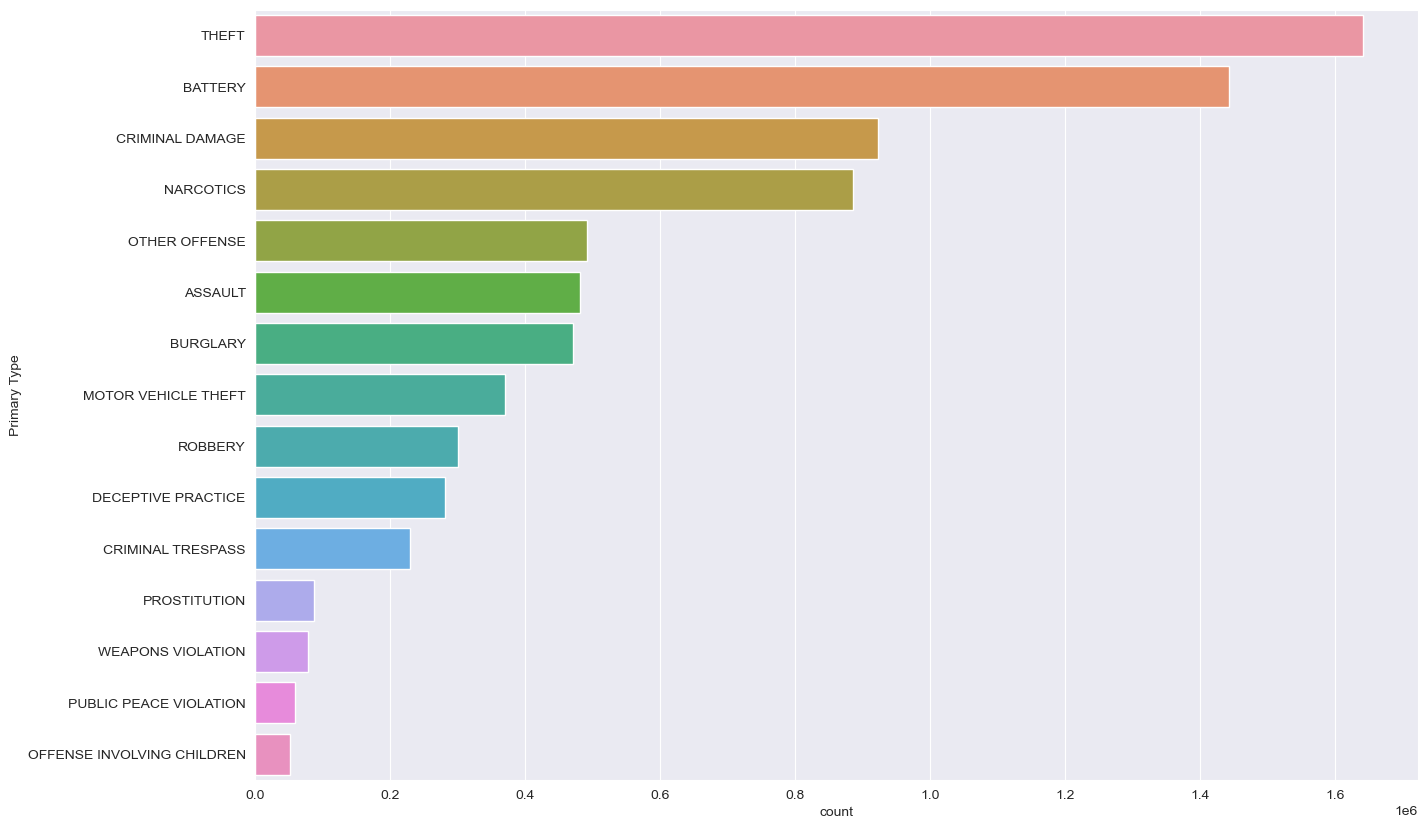

In [15]:
# 이걸 시각화하기
plt.figure(figsize=(15,10))
sns.countplot(y = 'Primary Type',data=chicago_df,order=order_data)

<Axes: xlabel='count', ylabel='Location Description'>

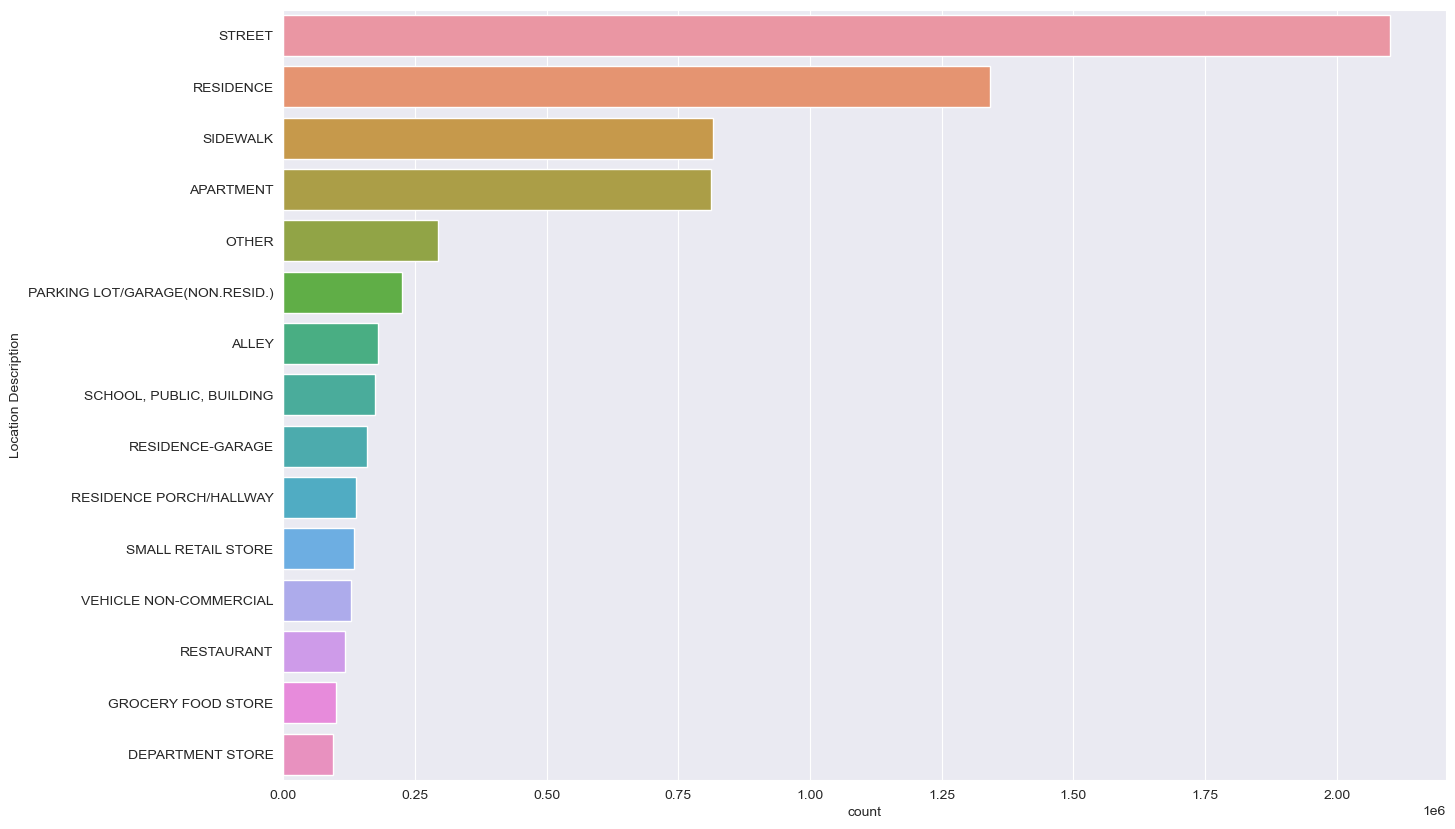

In [16]:
# 어디서 문제가 생겼는지 보기
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=chicago_df,order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [17]:
# 특정 시기에 얼마나 많은 데범죄가 발생했는지 알아보기
 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)
# date열에 있는 날짜 정보를 DatetimeIndex로 변환함
# 날짜와 시간을 기반한 인덱싱으로, 시계열 분석을 용이하게 함

In [18]:
# resample 명령어
# 데이터 프레임의 시계열 데이터를 연도별로 재표본화함, 
# Y는 year의 약자로 연도별로 데이터를 구룹화 하겠다는 의미
# .size로 연도별 데이터의 개수를 반환함

chicago_df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'number of crime')

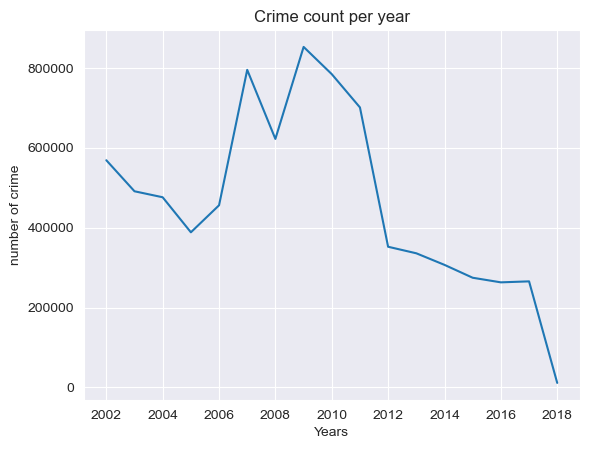

In [19]:
# 연도별 조회
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime count per year')
plt.xlabel('Years')
plt.ylabel('number of crime')

Text(0, 0.5, 'number of crime')

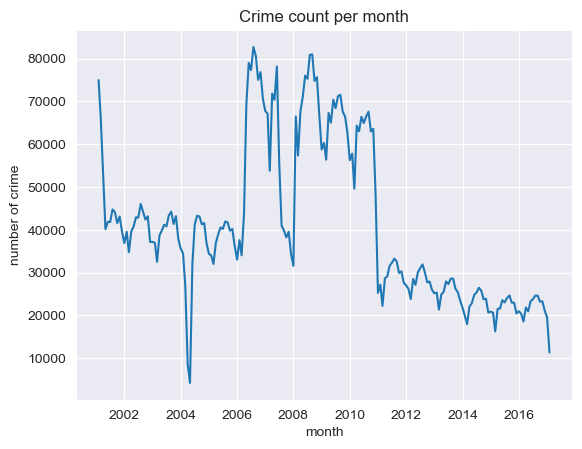

In [20]:
# 월별 조회 

plt.plot(chicago_df.resample('M').size())
plt.title('Crime count per month')
plt.xlabel('month')
plt.ylabel('number of crime')

Text(0, 0.5, 'number of crime')

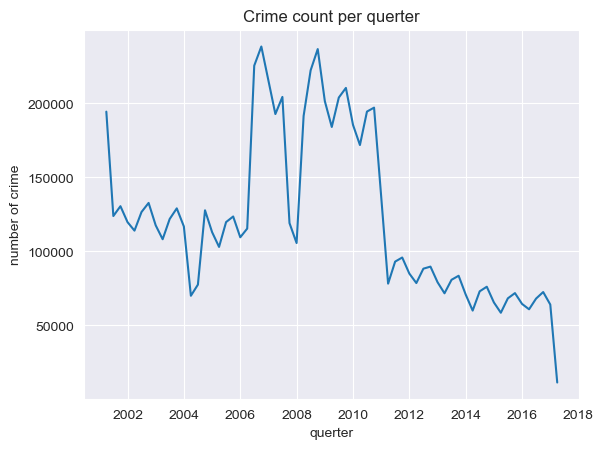

In [21]:
# 분기별 조회
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime count per querter')
plt.xlabel('querter')
plt.ylabel('number of crime')

## 데이터 준비하기

In [22]:
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [23]:
chicago_prophet.columns = ['Date','Crime Count']
# 열 이름 변경하기
# 데이터 프레임 열 이름을 순서대로 재지정함
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [24]:
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

# 딕셔너리 형태를 사용하여 컬럼의 이름을 바꾸는 방법
# 위와 같은 방식이지만, 위에꺼는 columns 속성을 변경하는거고
# 아래꺼는 rename 메소드를 사용하므로 복사본을 반환함.(inplace 도 사용가능)


In [25]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


## 예측하기

In [26]:
m = Prophet()
# prophet 모델의 인스턴스를 생성

m.fit(chicago_prophet_df_final)
# 생성된 인스턴스를 사용해, 주어진 데이터프레임에 대한 학습을 시작함
# 데이터 프레임은 최소한 두개의 열을 포함해야함.
# => ds(날짜를 나타내는 열), y(예측하고자 하는 대상의 값을 나타내는 열)

19:47:40 - cmdstanpy - INFO - Chain [1] start processing
19:47:40 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# 예측해보기
future = m.make_future_dataframe(periods=365)
# 이미 학습된 모델 m을 사용해 미래의 날짜를 포함하는 데이터프레임을 생성
# period 365는 365일 동안의 날짜 데이터 프레임을 생성하도록 지시함
# 이렇게하면 기존의 날짜(ds) + 1년의 데이터의 열을 갖는 데이터 프레임이 만들어짐

forecast = m.predict(future)
# predict 메소드로 예측을 수행함
# 이때 열들은 해당 열을 포함함
# ds: 예측 대상 날짜
# trend: 데이터의 장기적인 추세를 나타냅니다.
# yhat: 예측된 값 (모델이 예측한 해당 날짜의 값)
# yhat_lower와 yhat_upper: 예측된 값의 하한가와 상한가 (신뢰 구간)
# 그리고 다른 여러 계절성 요소와 트렌드를 반영하는 컴포넌트들



forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40555.692250,22387.334861,53163.610352,40555.692250,40555.692250,-1571.807261,-1571.807261,-1571.807261,-1571.807261,-1571.807261,-1571.807261,0.0,0.0,0.0,38983.884989
1,2001-02-28,40702.936728,18846.819608,49743.324484,40702.936728,40702.936728,-6456.150113,-6456.150113,-6456.150113,-6456.150113,-6456.150113,-6456.150113,0.0,0.0,0.0,34246.786614
2,2001-03-31,40865.957400,23671.368484,54849.190986,40865.957400,40865.957400,-2068.249109,-2068.249109,-2068.249109,-2068.249109,-2068.249109,-2068.249109,0.0,0.0,0.0,38797.708291
3,2001-04-30,41023.719340,23113.090965,57322.771330,41023.719340,41023.719340,-1473.678899,-1473.678899,-1473.678899,-1473.678899,-1473.678899,-1473.678899,0.0,0.0,0.0,39550.040441
4,2001-05-31,41186.740012,29646.958795,60722.922401,41186.740012,41186.740012,3883.786187,3883.786187,3883.786187,3883.786187,3883.786187,3883.786187,0.0,0.0,0.0,45070.526199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,9100.403654,-9618.017756,21938.387869,8852.547018,9403.602083,-3418.958476,-3418.958476,-3418.958476,-3418.958476,-3418.958476,-3418.958476,0.0,0.0,0.0,5681.445178
554,2018-01-28,9086.413729,-10213.463961,21910.764263,8837.979770,9391.540182,-2765.818411,-2765.818411,-2765.818411,-2765.818411,-2765.818411,-2765.818411,0.0,0.0,0.0,6320.595318
555,2018-01-29,9072.423804,-9490.661783,22491.371939,8822.308283,9379.271696,-2228.844305,-2228.844305,-2228.844305,-2228.844305,-2228.844305,-2228.844305,0.0,0.0,0.0,6843.579499
556,2018-01-30,9058.433879,-9348.262206,22935.998451,8806.037250,9366.174679,-1833.505246,-1833.505246,-1833.505246,-1833.505246,-1833.505246,-1833.505246,0.0,0.0,0.0,7224.928633


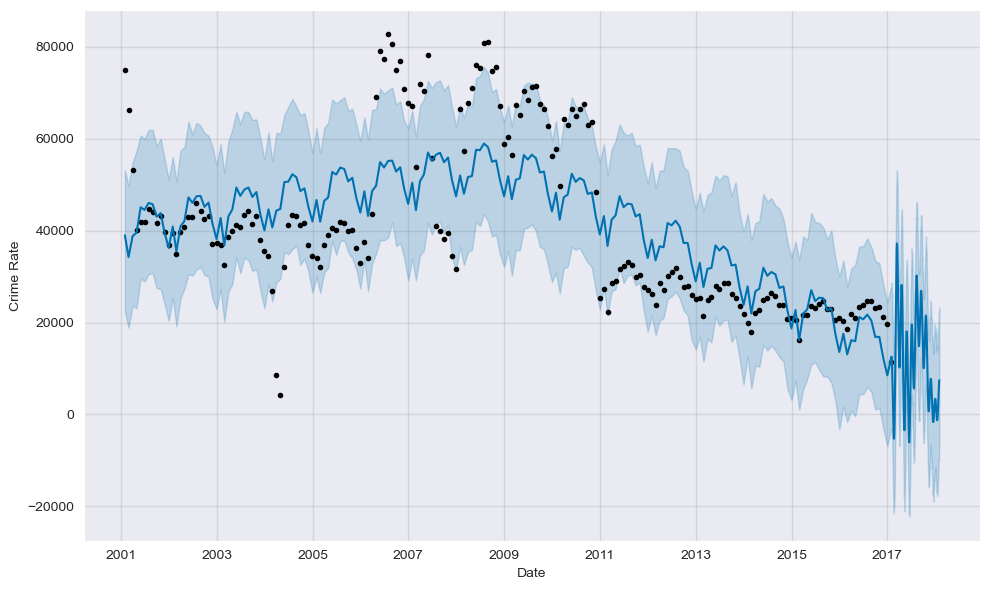

In [28]:
# 예측 데이터 시각화
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

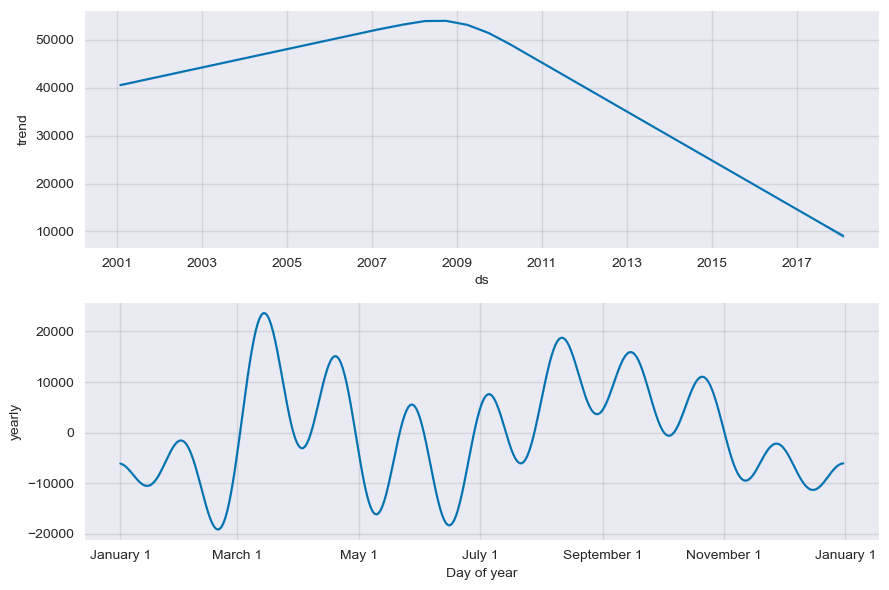

In [29]:
figure = m.plot_components(forecast)
# 범죄율 예측 및 월별 범죄율 예측